In [ ]:
import torch
import torch.nn as nn
conv = nn.Conv2d(3, 16, kernel_size=3)
print(conv)
print(conv.weight.shape, conv.bias.shape)

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
torch.Size([16, 3, 3, 3]) torch.Size([16])


In [ ]:
from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())
imgs = torch.stack([img_t for img_t, _ in cifar10], dim=3)

100%|██████████| 170498071/170498071 [00:02<00:00, 80349417.27it/s]


Extracting ../data-unversioned/p1ch7/cifar-10-python.tar.gz to ../data-unversioned/p1ch7/


In [ ]:
# Find mean and var
mean = imgs.view(3, -1).mean(dim=1)
var = imgs.view(3, -1).std(dim=1)
mean = mean.detach().numpy()
var = var.detach().numpy()

In [ ]:
transformed_cifer10 = datasets.CIFAR10(
    data_path, train = True, download=False,
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean,var)
    ])
)

In [ ]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label]) for img, label in transformed_cifer10 if label in [0,2]]

In [ ]:
print(cifar2[0])

(tensor([[[ 0.6142, -0.3224, -0.1160,  ..., -0.2589, -0.2747, -0.5446],
         [ 0.6619, -0.1477, -0.8462,  ..., -0.3224, -0.3224, -0.5764],
         [ 0.2332,  0.2650, -0.1001,  ..., -0.3382, -0.6557, -0.7510],
         ...,
         [ 0.2174,  0.2650,  0.1539,  ..., -0.5764, -0.4494,  0.0110],
         [ 0.5984,  0.4396,  0.3285,  ..., -0.6399, -0.4335,  0.0269],
         [ 0.9159,  0.8047,  0.4555,  ..., -0.4970, -0.5446, -0.0525]],

        [[ 1.3376,  0.2746,  0.4034,  ...,  0.3873,  0.3873,  0.0974],
         [ 1.4503,  0.5967, -0.2247,  ...,  0.3068,  0.3068,  0.0652],
         [ 1.0960,  1.1282,  0.6450,  ...,  0.2585, -0.0475, -0.1280],
         ...,
         [ 0.4034,  0.5162,  0.5323,  ...,  0.1780,  0.4034,  0.8544],
         [ 0.5484,  0.6611,  0.6611,  ...,  0.1135,  0.4034,  0.8866],
         [ 0.4840,  0.9511,  0.5001,  ...,  0.1780,  0.1619,  0.7578]],

        [[-0.4477, -0.7925, -0.1929,  ..., -0.6126, -0.6726, -0.8525],
         [-0.4477, -0.9724, -1.0624,  ..., -

In [ ]:
img, _ = cifar2[0]
#print(img)
conv = nn.Conv2d(3, 16, kernel_size=3, padding=1) #padding會在圖像周圍多一圈幽靈像素
output = conv(img.unsqueeze(0))
print(output)
img.unsqueeze(0).shape, output.shape

tensor([[[[ 0.4015,  0.7104,  0.2065,  ...,  0.2481,  0.2519,  0.1833],
          [ 0.4249,  0.5488,  0.3625,  ...,  0.1895,  0.2074,  0.0688],
          [ 0.3258,  0.3754,  0.3584,  ...,  0.2010,  0.1593, -0.0620],
          ...,
          [ 0.1888,  0.2824,  0.2879,  ...,  0.0834,  0.1544,  0.5636],
          [ 0.0288,  0.2981,  0.2762,  ...,  0.1538,  0.0387,  0.5412],
          [ 0.0194,  0.1603,  0.2228,  ..., -0.0340, -0.0586,  0.1380]],

         [[-0.2515,  0.4286, -0.1435,  ...,  0.0439, -0.0443, -0.1231],
          [-0.3023,  0.2193,  0.2620,  ..., -0.0849, -0.1237, -0.2481],
          [-0.2426, -0.1882,  0.0484,  ..., -0.0881, -0.1109, -0.3787],
          ...,
          [-0.0567,  0.0700,  0.1098,  ..., -0.3838, -0.3313, -0.2159],
          [-0.1793,  0.1156,  0.1404,  ..., -0.2469, -0.4021, -0.2565],
          [-0.1001, -0.0381,  0.1815,  ..., -0.1397, -0.1676, -0.1013]],

         [[-0.0358, -0.3424,  0.0456,  ...,  0.0871,  0.1001,  0.0716],
          [ 0.3326, -0.0340,  

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 32, 32]))

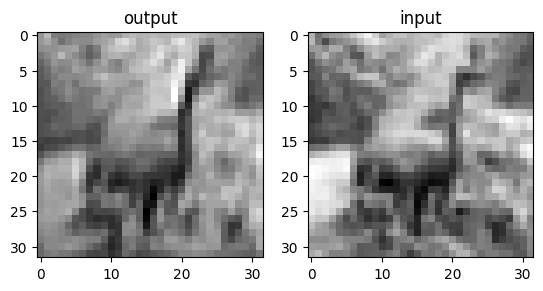

In [ ]:
from matplotlib import pyplot as plt
ax1 = plt.subplot(1, 2, 1)
plt.title('output')
plt.imshow(output[0, 0].detach(), cmap='gray') #detach()是將tensor轉換成numpy型態，plt內設的格式用numpy
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
plt.imshow(img.mean(0), cmap='gray')
plt.title('input')
plt.show()

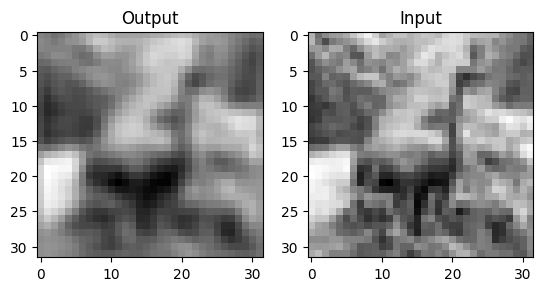

In [ ]:
with torch.no_grad():
    conv.bias.zero_()
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

output = conv(img.unsqueeze(0))

ax1 = plt.subplot(1, 2, 1)
plt.title('Output')
plt.imshow(output[0, 0].detach(), cmap = 'gray')
plt.subplot(1, 2, 2, sharex = ax1, sharey = ax1)
plt.imshow(img.mean(0), cmap = 'gray')
plt.title('Input')
plt.show()

Pooling

In [ ]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

nn.Module

In [ ]:
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act = nn.Tanh()
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8*8*8, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool(self.act(self.conv1(x)))
        out = self.pool(self.act(self.conv2(out)))
        out = out.view(-1, 8*8*8)
        out = self.act(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
import datetime

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs+1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item() #item()將損失轉換為Python的數字

        if epoch == 1 or epoch%10 == 0:
            print('{} Epoch{}, Training loss {}'.format(datetime.datetime.now(), epoch, loss_train/len(train_loader)))

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
model = Net()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(n_epochs = 100,
              optimizer = optimizer,
              model = model,
              loss_fn = loss_fn,
              train_loader = train_loader
              )


2024-01-24 10:10:21.568138 Epoch1, Training loss 0.5560431972051122
2024-01-24 10:11:03.764025 Epoch10, Training loss 0.33147653529218807
2024-01-24 10:11:52.056976 Epoch20, Training loss 0.2959347441317929
2024-01-24 10:12:38.615387 Epoch30, Training loss 0.2700299079630785
2024-01-24 10:13:25.933443 Epoch40, Training loss 0.24776223164265324
2024-01-24 10:14:12.374440 Epoch50, Training loss 0.2298724197183445
2024-01-24 10:14:58.759953 Epoch60, Training loss 0.2114326920194231
2024-01-24 10:15:45.053731 Epoch70, Training loss 0.19766993953543863
2024-01-24 10:16:31.190062 Epoch80, Training loss 0.18322364416471712
2024-01-24 10:17:17.887660 Epoch90, Training loss 0.1686647323428825
2024-01-24 10:18:04.304350 Epoch100, Training loss 0.15414239565847784


nn.Module函數式

In [ ]:
import torch.nn.functional as F
class Net_F(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8*8*8, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8*8*8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs+1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item() #item()將損失轉換為Python的數字

        if epoch == 1 or epoch%10 == 0:
            print('{} Epoch{}, Training loss {}'.format(datetime.datetime.now(), epoch, loss_train/len(train_loader)))

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
model = Net_F()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(n_epochs = 100,
              optimizer = optimizer,
              model = model,
              loss_fn = loss_fn,
              train_loader = train_loader
              )

2024-01-24 10:18:08.772533 Epoch1, Training loss 0.561191823262318
2024-01-24 10:18:50.811067 Epoch10, Training loss 0.32436472234452607
2024-01-24 10:19:36.664163 Epoch20, Training loss 0.2879610694707579
2024-01-24 10:20:27.391387 Epoch30, Training loss 0.26217054869908435
2024-01-24 10:21:14.082473 Epoch40, Training loss 0.2446553058874835
2024-01-24 10:22:00.570478 Epoch50, Training loss 0.22837990194938745
2024-01-24 10:22:47.419348 Epoch60, Training loss 0.21143518720462823
2024-01-24 10:23:34.297346 Epoch70, Training loss 0.19976975327464425
2024-01-24 10:24:20.606665 Epoch80, Training loss 0.1843104875960927
2024-01-24 10:25:06.869102 Epoch90, Training loss 0.17127999454546886
2024-01-24 10:25:53.436718 Epoch100, Training loss 0.15843941707899617


In [ ]:
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False,
        transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean,var)
    ]))
cifar2_val =[(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

def validate(model, train_loader, val_loader):
    for name, loader in [('train', train_loader), ('val', val_loader)]:
        correct = 0
        total = 0
        with torch.no_grad():
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
        print('Accracy {}: {:.2f}'.format(name, correct/total))

validate(model, train_loader, val_loader)

Accracy train: 0.94
Accracy val: 0.89


儲存與匯入模型參數

In [ ]:
torch.save(model.state_dict(), data_path + 'birds_vs_airplanes.pt')
#只記錄參數，未紀錄模型架構

In [ ]:
loaded_model = Net() #確保在儲存參數之後，Net類別的定義未被更改
loaded_model.load_state_dict(torch.load(data_path + 'birds_vs_airplanes.pt'))


<All keys matched successfully>

在GPU上訓練

In [ ]:
device = (torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))
print(f'Training on device {device}.')

Training on device cpu.


In [ ]:
import datetime

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs+1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device = device)
            labels = labels.to(device = device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss{}'.format(datetime.datetime.now(), epoch, loss_train/len(train_loader)))

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
model = Net().to(device = device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(n_epochs = 100,
        optimizer = optimizer,
        model = model,
        loss_fn = loss_fn,
        train_loader = train_loader,
        )

2024-01-24 10:26:05.400402 Epoch 1, Training loss0.5675109317348261
2024-01-24 10:26:46.940363 Epoch 10, Training loss0.3430965224838561
2024-01-24 10:27:33.135492 Epoch 20, Training loss0.28781458175486063
2024-01-24 10:28:19.312134 Epoch 30, Training loss0.25920344632901965
2024-01-24 10:29:05.578113 Epoch 40, Training loss0.23940537779764004
2024-01-24 10:29:51.944838 Epoch 50, Training loss0.22581820783151943
2024-01-24 10:30:37.748308 Epoch 60, Training loss0.21002103654062673
2024-01-24 10:31:24.157638 Epoch 70, Training loss0.19520974391774767
2024-01-24 10:32:10.335704 Epoch 80, Training loss0.18190448783385527
2024-01-24 10:32:56.923243 Epoch 90, Training loss0.1709415989032217
2024-01-24 10:33:42.931763 Epoch 100, Training loss0.15588949957660808


In [ ]:
loader_model = Net().to(device=device)
loader_model.load_state_dict(torch.load(data_path + 'birds_vs_airplanes.pt', map_location = device))

<All keys matched successfully>

# 增加模型的記憶容量：寬度

In [ ]:
class NetWidth(nn.Module):
    def __init__(self, n_channel):
        super().__init__()
        self,n_channel = n_channel
        self.conv1 = nn.Conv2d(3, n_channel, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_channel, n_channel//2, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8*8*n_channel//2, 32)
        self.fc2 = nn.Linear(n_channel, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.con2(out)), 2)
        out = out.view(-1, 8*8*self.n_channel//2)
        out = torch.tanh(self.fnc1(out))
        out = self.fc2(out)
        return out

###約束模型參數：權重懲罰機制(weight penalities)  
懲罰較大的權重，為了讓損失值得變化能夠更加平滑  
最常見的有L2常規化(取模型權重的平方和)及L1常規化(取模型權重的絕對值總和)  
兩者皆呈上一個小因子lambda，該因子為訓練前設定好的參數  

In [ ]:
def training_loop_l2reg(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs+1):
        loss_train =0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device = device)
            labels = labels.to(device = device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            l2_lambda = 0.001
            l2_norm = sum(p.pow(2.0).sum() for p in model.parameters()) # if using l1 normalization, u only change pow() to abs()
            loss = loss + l2_lambda * l2_norm

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(datetime.datetime.now(), epoch, loss_train/len(train_loader)))

### 避免過度依賴單一輸入資料：丟棄法(DropOut)
在每次訓練過程中，雖機將一部份神經元的輸出歸零(相當於丟棄這些神經元)  
原因  
1. 進而避免造成在過度適配會發生的記憶效應
2. 丟棄法能在模型所產生的特徵中加入干擾

In [ ]:
class NetDropout(nn.Module):
    def __init__(self, n_chansl):
        super().__init__()
        self.n_chansl = n_chansl
        self.conv1 = nn.Conv2d(3, n_chansl, kernel_size=3, padding=1)
        self.conv1_dropout = nn.Dropout2d(p=0.4) #丟棄機率為0.4,留下大約60%神經元
        self.conv2 = nn.Conv2d(n_chansl, n_chansl//2, kernel_size=3, padding=1)
        self.conv2_dropout = nn.Dropout2d(p=0.4)
        self.fc1 = nn.Linear(8*8*n_chansl//2, n_chansl)
        self.fc2 = nn.Linear(n_chansl, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = self.conv1_dropout(out)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = self.conv2_dropout(out)
        out = out.view(-1, 8*8*self.n_chansl//2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

### 約束激活函數：批次正規化(Batch Normaliation)
原理：重新輸入資料的數值分布，以避免輸入的小批次資料落入激活函數的飽和區域  
效益：允許使用更高的學習率、降低訓練效果對初始化的依賴程度，因此成為dropout的替代方案  


In [ ]:
class NetBatchNorm(nn.Module):
    def __init__(self, n_chansl=32):
        super().__init__()
        self.n_chansl = n_chansl
        self.conv1 = nn.Conv2d(3, n_chansl, kernel_size=3, padding=1)
        self.conv1_batchnorm = nn.BatchNorm2d(num_feature = n_chansl)
        self.conv2 = nn.Conv2d(n_chansl, n_chansl//2, kernel_size=3, padding=1)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features= n_chansl//2)
        self.fc1 = nn.Linear(8*8*n_chansl//2, n_chansl)
        self.fc2 = nn.Linear(n_chansl, 2)

    def forward(self, x):
        out = self.couv1_batchnorm(self.conv1(x))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = self.conv2_batchnorm(self.conv1(out))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = out.view(-1, 8*8*self.n_chansl//2)
        out = torch.tanh(self.fcl(out))
        out = self.fc2(out)
        return out

# 深入探索更複雜的結構：深度

### 跳躍連接(skip connections)

In [ ]:
class NetDepth(nn.Module):
    def __init__(self, n_chansl=32):
        super().__init__()
        self.n_chansl = n_chansl
        self.conv1 = nn.Conv2d(3, n_chansl, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chansl, n_chansl//2, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(n_chansl//2, n_chansl//4, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4*4*n_chansl//4, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = F.max_pool2d(torch.relu(self.conv3(out)), 2)
        out = out.view(-1, 4*4*self.n_chansl//4)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

- 殘差網路(residual network, ResNets)

In [ ]:
class NetRes(nn.Module):
    def __init__(self, n_chansl=32):
        super().__init__()
        self.n_chansl = n_chansl
        self.conv1 = nn.Conv2d(3, n_chansl, kermel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chansl, n_chansl//2, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(n_chansl//2, n_chansl//4, kernel_size=3, padding=1)

        self.fc1 = nn.Linear(4*4*n_chansl//4, n_chansl)
        self.fc2 = nn.Linear(n_chansl, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)),2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out1 = out
        out = F.max_pool2d(torch.relu(self.conv3(out)) + out1, 2) #殘差處理
        out = out.view(-1, 4*4*self.n_chansl//4)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

### 利用Pytorch建立非常深層的模型
若要建立深度大於20以上的神經網路  
建議建立殘差塊，會大幅減少程式的記憶體空間

In [ ]:
class ResBlock(nn.Module):
    def __init__(self, n_chansl):
        super(ResBlock, self).__init__()
        self.conv = nn.Conv2d(n_chansl, n_chansl, kernel_size=3, padding=1, bias=False) #因為BatchNorm層會抵消偏值的作用，因此這裡將bias設為False
        self.batch_norm = nn.BatchNorm2d(num_features=n_chansl)
        torch.nn.init.kaiming_normal_(self.conv.weight, nonlinearity='relu') #這裡使用了客製化的初始方法.kaiming_normal_, 在初始階段，batch_norm的分布平均值為0，標準差0.5
        torch.nn.init.constant_(self.batch_norm.weight, 0.5)
        torch.nn.init.zeros_(self.batch_norm.bias)

    def forward(self, x):
        out = self.conv(x)
        out = self.batch_norm(out)
        out = torch.relu(out)
        return


class NetResDeep(nn.Module):
    def __init__(self, n_chansl=32, n_blocks=20):
        super().__init__()
        self.n_chansl = n_chansl
        self.conv1 = nn.Conv2d(3, n_chansl, kernal_size=3, padding=1)
        self.resblock = nn.Sequential( *(n_blocks * [ResBlock(n_chansl=n_chansl)]))
        self.fc1 = nn.Linear(8*8*n_chansl, 32)
        self.fc2 = nn.Linear(n_chansl, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = self.resblocks(out)
        out = F.max_pool2d(out, 2)
        out = out.view(-1, 8*8*self.n_chansl)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out